In [1]:
try:
    spark.stop()
except:
    pass

# Using findspark to find automatically the spark folder
import findspark
findspark.init()

# import python libraries

# initialize
from pyspark.sql import SparkSession

from pyspark.sql.types import StringType
from pyspark.sql.types import DoubleType
from pyspark.sql.types import DateType
from pyspark.sql.types import IntegerType
from pyspark.sql import functions as F
from pyspark.sql import Row

# from pyspark.ml.feature import HashingTF, IDF, RegexTokenizer, StringIndexer, NGram
# from pyspark.ml.classification import LogisticRegression
# from pyspark.ml import Pipeline
# from pyspark.mllib.evaluation import MulticlassMetrics

spark = SparkSession.builder.master("local[*]").getOrCreate()


In [2]:
# df = spark.read.option("sep", "\t").option("header", "true").csv("../Downloads/2005_-_2015_Graduation_Outcomes.tsv")

In [3]:
# df.printSchema()
# df.select('Demographic').show(truncate=False)
# df.createOrReplaceTempView("dfnew")
# df.toPandas().head()
# spark.sql("select distinct Demographic from dfnew").show(truncate=False)

In [4]:
df = spark.read.option("sep", "\t").option("header", "true").csv("../Downloads/311_Service_Requests_for_2006.tsv")

In [79]:
# df.columns
# df.select('Unique Key', 'Created Date', 'Closed Date', 'Incident Zip', 'Borough').show(truncate=False)

In [5]:
import numpy as np
import pandas as pd

In [80]:
# df.count()

In [81]:
def correct_zip(zip_code):
    try:
        zip_code = int(float(zip_code))
    except:
        try:
            zip_code = int(float(zip_code.split('-')[0]))
        except:
            return None
    if zip_code < 10000 or zip_code > 19999:
        return None
    else:
        return str(zip_code)

def remove_borough(b):
    if b=="Unspecified":
        return None
    else:
        return b

def create_date(date):
    datel = date.split(" ")
    return datel[0]

def create_month(date):
    datel = date.split("/")
    try:
        return int(datel[0])
    except:
        return 

create_month = F.udf(create_month, IntegerType())
create_date = F.udf(create_date, StringType())
remove_borough = F.udf(remove_borough, StringType())
correct_zip = F.udf(correct_zip, StringType())

In [38]:
# df.columns
# df.select("Latitude", "Longitude").show()
# newdf = df.filter(df.Latitude.isNotNull())
# newdf = newdf.filter(df.Longitude.isNotNull())
# newdf = newdf.filter(F.col("Closed Date").isNotNull())
# newdf.select("Latitude", "Longitude").show()
# newdf.count()

In [82]:
# df = df.na.fill("null")
df.createOrReplaceTempView("df")
# spark.sql("select distinct `Incident Zip`from df").rdd.take(50)
# df.select('Incident Zip', 'Borough').show()
df = df.withColumn("zip", correct_zip(F.col("Incident Zip")))
# df.select("zip").show()
df = df.withColumn('borough', remove_borough(F.col("Borough")))
df = df.withColumn('created_date', create_date(F.col("Created Date")))
df = df.withColumn('closed_date', create_date(F.col("Closed Date")))
df = df.withColumn('created_month', create_month(F.col("Created Date")))
df = df.filter(df.borough.isNotNull())
df = df.filter(df.Latitude.isNotNull())
df = df.filter(df.Longitude.isNotNull())
df = df.filter(df.created_month.isNotNull())
df = df.filter(F.col("Closed Date").isNotNull())
df.select('created_month', 'closed_date').show()
# df.count()

+-------------+-----------+
|created_month|closed_date|
+-------------+-----------+
|            4| 05/19/2006|
|            4| 05/29/2009|
|           11| 06/01/2009|
|            5| 05/27/2006|
|            6| 06/08/2006|
|            8| 08/21/2006|
|            8| 08/21/2006|
|            8| 08/05/2006|
|            9| 09/05/2006|
|            1| 01/06/2006|
|            8| 08/16/2006|
|            1| 01/06/2006|
|            8| 08/11/2006|
|            9| 09/27/2006|
|            1| 01/24/2006|
|            6| 06/13/2006|
|            6| 05/29/2009|
|            8| 08/19/2006|
|            9| 09/26/2006|
|            9| 09/26/2006|
+-------------+-----------+
only showing top 20 rows



In [56]:
# spark.sql("select distinct agency from df").show()
# spark.sql("select distinct `Complaint Type` from df").show()
# spark.sql("Select distinct City from df").show(df.count())

In [11]:
# df.count()
# df.select('City','borough').show(1000)

In [58]:
# df.select('City').distinct().show(df.count())
# df.select('Status').distinct().show(df.count())
# df.select('Borough').distinct().show(df.count())
# df.groupBy('Agency').count().select('Agency', F.col("count").alias("ctr")).show()

In [59]:
df.select("Latitude", "Longitude").show()

+---------------+----------------+
|       Latitude|       Longitude|
+---------------+----------------+
|40.727090279701|-73.976638730132|
|40.605520957995|-74.002117592825|
| 40.67560770823|-73.728742151361|
|40.636454776697|-74.000526040593|
|40.672619197264| -73.95435384966|
|40.710023243413|-73.916977799538|
|40.821556094196|-73.896887434225|
|40.727090279701|-73.976638730132|
|40.763048649245|-73.902342276776|
|40.636454776697|-74.000526040593|
|40.636454776697|-74.000526040593|
|40.636454776697|-74.000526040593|
|40.636454776697|-74.000526040593|
|40.636454776697|-74.000526040593|
|40.689628190909|-73.953440732874|
|40.745934212513|-73.709552090395|
|40.745934212513|-73.709552090395|
|40.727090279701|-73.976638730132|
|40.710023243413|-73.916977799538|
|40.710023243413|-73.916977799538|
+---------------+----------------+
only showing top 20 rows



In [104]:
# df.columns

In [13]:
df.createOrReplaceTempView("df")
bronx = spark.sql("select `Complaint Type`, Borough, count(*) from df where Borough=\"BRONX\" group by Borough, `Complaint Type` order by Borough, count(*) desc limit 5")
manhattan = spark.sql("select `Complaint Type`, Borough, count(*) from df where Borough=\"MANHATTAN\" group by Borough, `Complaint Type` order by Borough, count(*) desc limit 5")
staten_island = spark.sql("select `Complaint Type`, Borough, count(*) from df where Borough=\"STATEN ISLAND\" group by Borough, `Complaint Type` order by Borough, count(*) desc limit 5")
brooklyn = spark.sql("select `Complaint Type`, Borough, count(*) from df where Borough=\"BROOKLYN\" group by Borough, `Complaint Type` order by Borough, count(*) desc limit 5")
queens = spark.sql("select `Complaint Type`, Borough, count(*) from df where Borough=\"QUEENS\" group by Borough, `Complaint Type` order by Borough, count(*) desc limit 5")
# df.groupBy("Complaint Type", "Borough").count().select('Complaint Type','Borough', F.col("count").alias("ctr")).orderBy([F.col("ctr"), F.col("Borough")], ascending=False).show(df.count(), truncate=False)

bronx.show(truncate=False)
manhattan.show(truncate=False)
staten_island.show(truncate=False)
brooklyn.show(truncate=False)
queens.show(truncate=False)



+-----------------------+-------+--------+
|Complaint Type         |Borough|count(1)|
+-----------------------+-------+--------+
|Water System           |BRONX  |11459   |
|Street Light Condition |BRONX  |11113   |
|Noise - Street/Sidewalk|BRONX  |8265    |
|Sewer                  |BRONX  |8198    |
|Blocked Driveway       |BRONX  |8051    |
+-----------------------+-------+--------+

+-----------------------+---------+--------+
|Complaint Type         |Borough  |count(1)|
+-----------------------+---------+--------+
|Noise                  |MANHATTAN|21001   |
|Noise - Street/Sidewalk|MANHATTAN|15668   |
|Taxi Complaint         |MANHATTAN|14104   |
|Noise - Commercial     |MANHATTAN|13888   |
|Water System           |MANHATTAN|13541   |
+-----------------------+---------+--------+

+---------------------------------+-------------+--------+
|Complaint Type                   |Borough      |count(1)|
+---------------------------------+-------------+--------+
|Street Light Condition      

In [146]:
# Finding the complaints by Seasons?. 
# Say that we find the complaint type by Month of a year
newdf = df.select("created_date", "closed_date", "created_month", "Complaint Type", "Borough", "Agency")
newdf = newdf.select(F.col("*"), F.to_date("created_date", "MM/dd/yyyy").alias("unix_created"))
newdf = newdf.select(F.col("*"), F.to_date("closed_date", "MM/dd/yyyy").alias("unix_closed"))
newdf.select("created_month","created_date", "unix_created", "closed_date", "unix_closed").show()
# datedf.show(truncate=False)
newdf.filter(newdf.unix_closed >= newdf.unix_created).show()

# df.filter(df["Created Date"] > df["Closed Date"]).select("Created Date", "Closed Date").show(truncate = False)
# datedf.schema

+-------------+------------+------------+-----------+-----------+
|created_month|created_date|unix_created|closed_date|unix_closed|
+-------------+------------+------------+-----------+-----------+
|            4|  04/20/2006|  2006-04-20| 05/19/2006| 2006-05-19|
|            4|  04/18/2006|  2006-04-18| 05/29/2009| 2009-05-29|
|           11|  11/07/2006|  2006-11-07| 06/01/2009| 2009-06-01|
|            5|  05/27/2006|  2006-05-27| 05/27/2006| 2006-05-27|
|            6|  06/07/2006|  2006-06-07| 06/08/2006| 2006-06-08|
|            8|  08/21/2006|  2006-08-21| 08/21/2006| 2006-08-21|
|            8|  08/21/2006|  2006-08-21| 08/21/2006| 2006-08-21|
|            8|  08/05/2006|  2006-08-05| 08/05/2006| 2006-08-05|
|            9|  09/04/2006|  2006-09-04| 09/05/2006| 2006-09-05|
|            1|  01/03/2006|  2006-01-03| 01/06/2006| 2006-01-06|
|            8|  08/16/2006|  2006-08-16| 08/16/2006| 2006-08-16|
|            1|  01/05/2006|  2006-01-05| 01/06/2006| 2006-01-06|
|         

In [151]:
# newdf.select(F.col("unix_closed")-F.col("unix_created")).show()
# newdf.schema
timestamp = (F.unix_timestamp('unix_closed', "yyyy-MM-dd") - F.unix_timestamp('unix_created', "yyyy-MM-dd"))/86400
newdf = newdf.withColumn("process_time", timestamp)
newdf.filter(newdf.Borough=="MANHATTAN").select("process_time").show()

+-----------------+
|     process_time|
+-----------------+
|             29.0|
|              0.0|
|              0.0|
|              0.0|
|              0.0|
|              0.0|
|              0.0|
|              1.0|
|              1.0|
|              1.0|
|              1.0|
|              0.0|
|7.041666666666667|
|7.041666666666667|
|              5.0|
|              2.0|
|              1.0|
|              3.0|
|              0.0|
|              0.0|
+-----------------+
only showing top 20 rows



In [152]:
newdf.groupBy("Borough").agg({'process_time':'avg', 'borough':'count'}).show()
newdf.groupBy("Agency").agg({'process_time':'avg', 'borough':'count'}).show()

+-------------+--------------+------------------+
|      Borough|count(borough)| avg(process_time)|
+-------------+--------------+------------------+
|       QUEENS|        288712|31.058002005458732|
|     BROOKLYN|        284030| 43.45282701944627|
|        BRONX|        115590| 35.09718581480519|
|    MANHATTAN|        198569|  25.1869411052749|
|STATEN ISLAND|         75045|24.824945588202645|
+-------------+--------------+------------------+

+------+--------------+-------------------+
|Agency|count(borough)|  avg(process_time)|
+------+--------------+-------------------+
|   DOT|        208173|   7.78393091323083|
|   DCA|         17542| 301.31775643218214|
|   HPD|             3|  9.347222222222223|
|   DPR|         39335|  415.4491621117748|
|   TLC|         18845|  24.10381622004068|
| 3-1-1|           169| 381.92899408284023|
|  NYPD|        190107|0.20396167246164879|
|   DOB|        115226|  41.08658853036635|
|   DEP|        212905| 10.096235214454028|
|   DOE|          732

In [103]:
newdf.createOrReplaceTempView("newdf")
print("Change over the months for Brooklyn")
print("For Winter")
spark.sql("select `Complaint Type`, count(*) as ctr from newdf where created_month=12 or created_month=1 or created_month=2 and Borough=\"BROOKLYN\" group by `Complaint Type` order by ctr desc limit 5").show(truncate=False)
print("For Spring")
spark.sql("select `Complaint Type`, count(*) as ctr from newdf where created_month=3 or created_month=4 or created_month=5 and Borough=\"BROOKLYN\" group by `Complaint Type` order by ctr desc limit 5").show(truncate=False)
print("For Summer")
spark.sql("select `Complaint Type`, count(*) as ctr from newdf where created_month=6 or created_month=7 or created_month=8 and Borough=\"BROOKLYN\" group by `Complaint Type` order by ctr desc limit 5").show(truncate=False)
print("For Fall")
spark.sql("select `Complaint Type`, count(*) as ctr from newdf where created_month=9 or created_month=10 or created_month=11 and Borough=\"BROOKLYN\" group by `Complaint Type` order by ctr desc limit 5").show(truncate=False)

print("Change over the months for QUEENS")
print("For Winter")
spark.sql("select `Complaint Type`, count(*) as ctr from newdf where created_month=12 or created_month=1 or created_month=2 and Borough=\"QUEENS\" group by `Complaint Type` order by ctr desc limit 5").show(truncate=False)
print("For Spring")
spark.sql("select `Complaint Type`, count(*) as ctr from newdf where created_month=3 or created_month=4 or created_month=5 and Borough=\"QUEENS\" group by `Complaint Type` order by ctr desc limit 5").show(truncate=False)
print("For Summer")
spark.sql("select `Complaint Type`, count(*) as ctr from newdf where created_month=6 or created_month=7 or created_month=8 and Borough=\"QUEENS\" group by `Complaint Type` order by ctr desc limit 5").show(truncate=False)
print("For Fall")
spark.sql("select `Complaint Type`, count(*) as ctr from newdf where created_month=9 or created_month=10 or created_month=11 and Borough=\"QUEENS\" group by `Complaint Type` order by ctr desc limit 5").show(truncate=False)


print()


Change over the months for Brooklyn
For Winter
+----------------------+-----+
|Complaint Type        |ctr  |
+----------------------+-----+
|Street Light Condition|15248|
|Sewer                 |11928|
|Street Condition      |11027|
|Blocked Driveway      |10511|
|Water System          |9771 |
+----------------------+-----+

For Spring
+----------------------+-----+
|Complaint Type        |ctr  |
+----------------------+-----+
|Street Light Condition|15458|
|Sewer                 |12948|
|Street Condition      |12687|
|Water System          |12544|
|Blocked Driveway      |9901 |
+----------------------+-----+

For Summer
+-----------------------------+-----+
|Complaint Type               |ctr  |
+-----------------------------+-----+
|Water System                 |24119|
|Sewer                        |21387|
|Noise - Street/Sidewalk      |17203|
|Street Light Condition       |15076|
|General Construction/Plumbing|11065|
+-----------------------------+-----+

For Fall
+------------------

In [123]:
# Find resolution times per borough
# First time resolution times in minutes?
temp = df.select("created_date", "closed_date")
temp.schema

StructType(List(StructField(created_date,StringType,true),StructField(closed_date,StringType,true)))

In [108]:
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Polygon, Point
%matplotlib inline

In [125]:
street_map = gpd.read_file("../Downloads/UHF_42_DOHMH_2009/UHF_42_DOHMH_2009.shp")

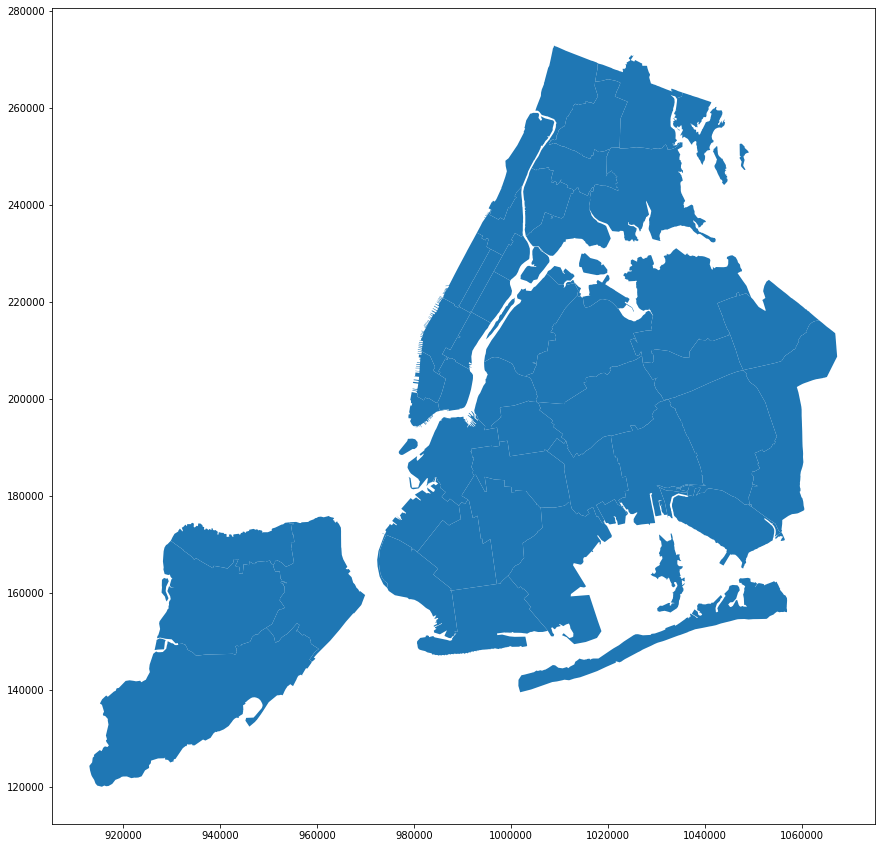

In [126]:
fig,ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax)

In [112]:
crs = {'init':'epsg:4326'}

In [121]:
comp_type = spark.sql("SELECT `Complaint Type`, Latitude, Longitude from df limit 1000")
# comp_type = comp_type.select(F.col('*'), comp_type.Latitude.cast('float'))
# comp_type = comp_type.select(F.col('*'), comp_type.Longitude.cast('float'))
ct = comp_type.toPandas()
ct.head()

,Complaint Type,Latitude,Longitude
0,DCA / DOH New License Application Request,None,None
1,Ferry Inquiry,None,None
2,Maintenance or Facility,None,None
3,DCA / DOH New License Application Request,None,None
4,Consumer Complaint,None,None


In [110]:
geometry = []
for row in df.rdd.take(100):
    print(row.Longitude)
    geometry.append(Point([float(row.Longitude), float(row.Latitude)]))
geometry[:3]

-73.976638730132
-74.002117592825
-73.728742151361
-74.000526040593
-73.95435384966
-73.916977799538
-73.896887434225
-73.976638730132
-73.902342276776
-74.000526040593
-74.000526040593
-74.000526040593
-74.000526040593
-74.000526040593
-73.953440732874
-73.709552090395
-73.709552090395
-73.976638730132
-73.916977799538
-73.916977799538
-73.988472383742
-73.988472383742
-73.976638730132
-73.976638730132
-73.976638730132
-73.976638730132
-73.777735932581
-73.777735932581
-73.902342276776
-73.902342276776
-73.961586113257
-73.976638730132
-73.976638730132
-74.000526040593
-73.995301463182
-74.000526040593
-73.976638730132
-74.000526040593
-74.000526040593
-74.000526040593
-74.000526040593
-74.000526040593
-74.000526040593
-74.000526040593
-74.000526040593
-73.894018622264
-73.961586113257
-74.000526040593
-73.799994243038
-73.95185845305
-73.976638730132
-73.976638730132
-73.935177980398
-74.164818803046
-73.976638730132
-73.976638730132
-73.777735932581
-74.000526040593
-73.960361727744

In [114]:
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
geo_df.head()
# fig,ax = plt.subplots(figsize=(15,15))
# street_map.plot(ax=ax, alpha=0.4, color="grey")
# geo_df[geo_df["Complaint Type"]=="Noise"].plot(ax=ax, markersize=20, color="blue", marker='o, label="Noise"')

ValueError: DataFrame constructor not properly called!